In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import cm

In [22]:
def visualize_clusters(dataset, linkage_matrix, distance_threshold):
  cluster_labels = fcluster(linkage_matrix, distance_threshold, criterion='distance')

  cmap = cm.tab20

  plt.figure(figsize=(10, 7))
  plt.scatter(dataset[:, 0], dataset[:, 1], c=cmap(cluster_labels), cmap=cmap)
  plt.title('Clustered Data')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.show()

C:\Users\LAB 102 PC 12\AppData\Local\Temp\ipykernel_23300\2728282651.py:26: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(distance_matrix, method=linkage_method)


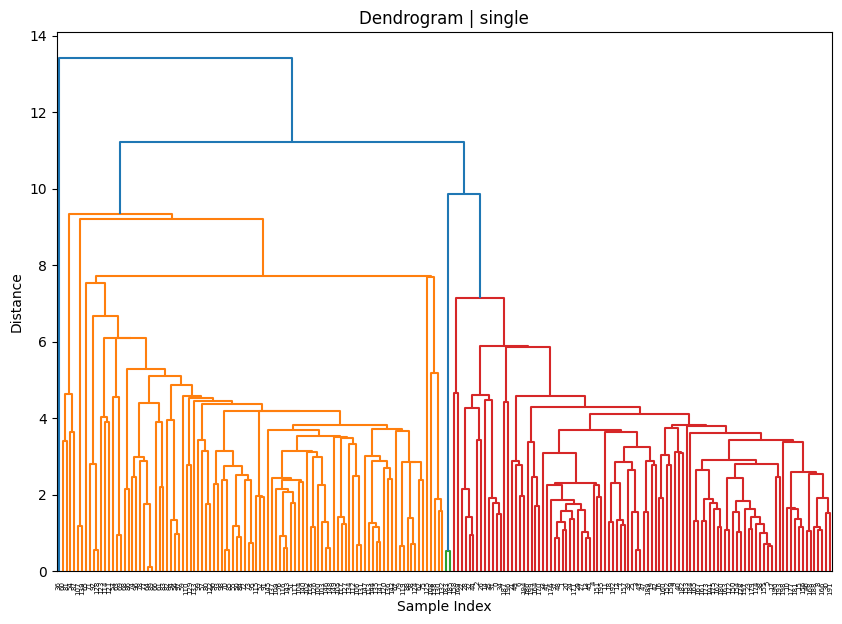

C:\Users\LAB 102 PC 12\AppData\Local\Temp\ipykernel_23300\2771227556.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(dataset[:, 0], dataset[:, 1], c=cmap(cluster_labels), cmap=cmap)


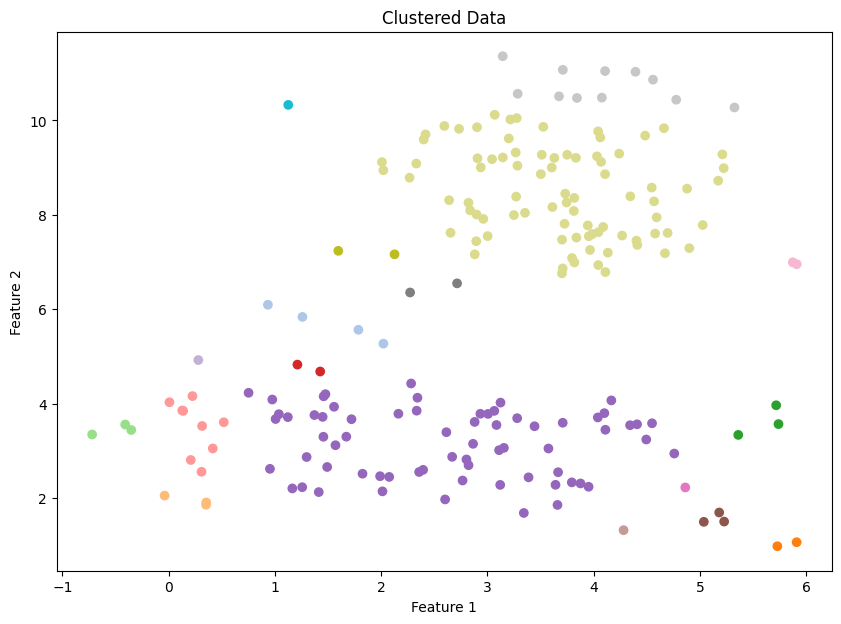

C:\Users\LAB 102 PC 12\AppData\Local\Temp\ipykernel_23300\2728282651.py:26: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(distance_matrix, method=linkage_method)


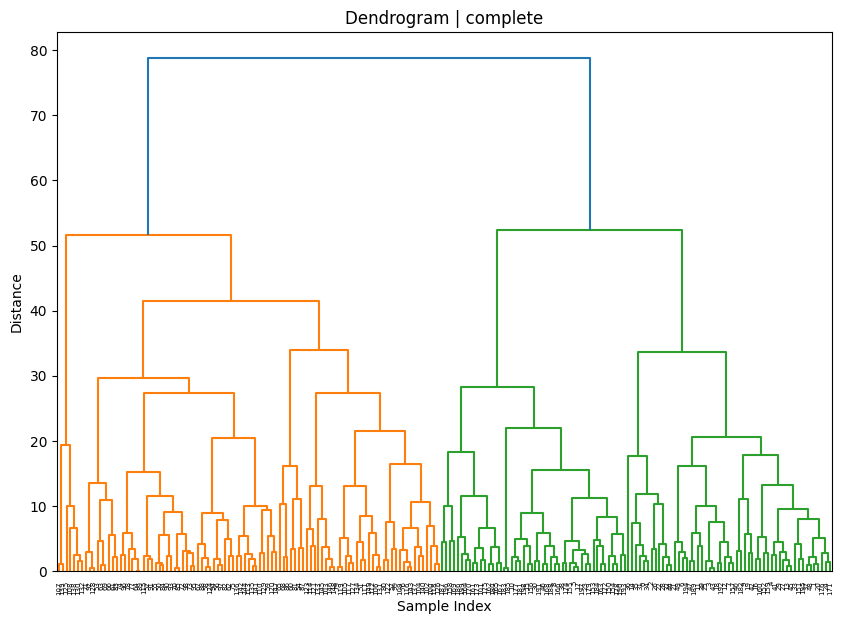

C:\Users\LAB 102 PC 12\AppData\Local\Temp\ipykernel_23300\2771227556.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(dataset[:, 0], dataset[:, 1], c=cmap(cluster_labels), cmap=cmap)


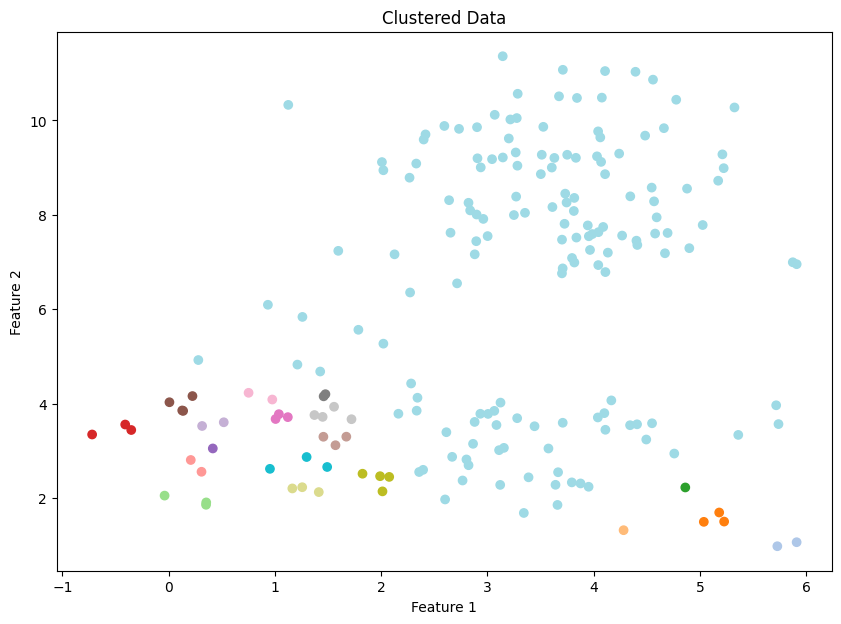

C:\Users\LAB 102 PC 12\AppData\Local\Temp\ipykernel_23300\2728282651.py:26: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(distance_matrix, method=linkage_method)


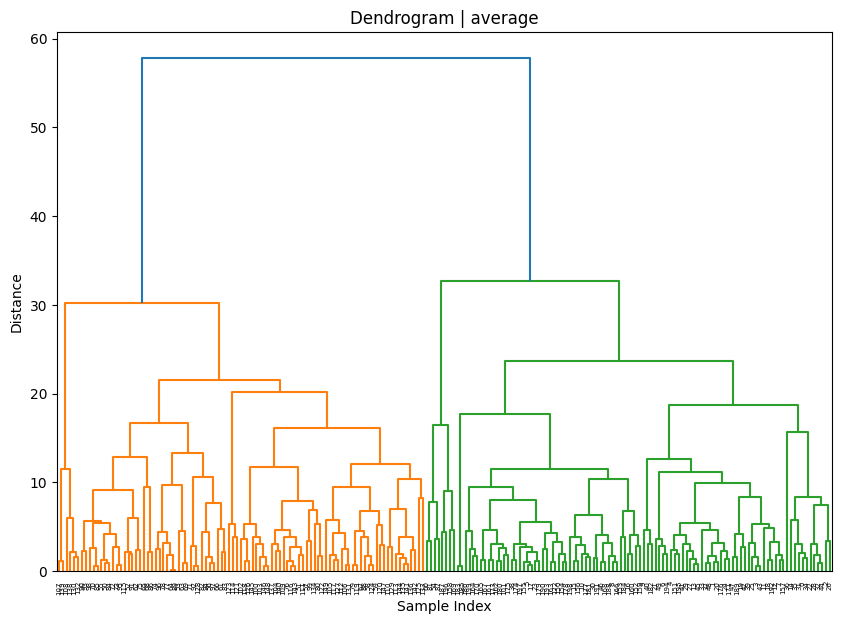

C:\Users\LAB 102 PC 12\AppData\Local\Temp\ipykernel_23300\2771227556.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(dataset[:, 0], dataset[:, 1], c=cmap(cluster_labels), cmap=cmap)


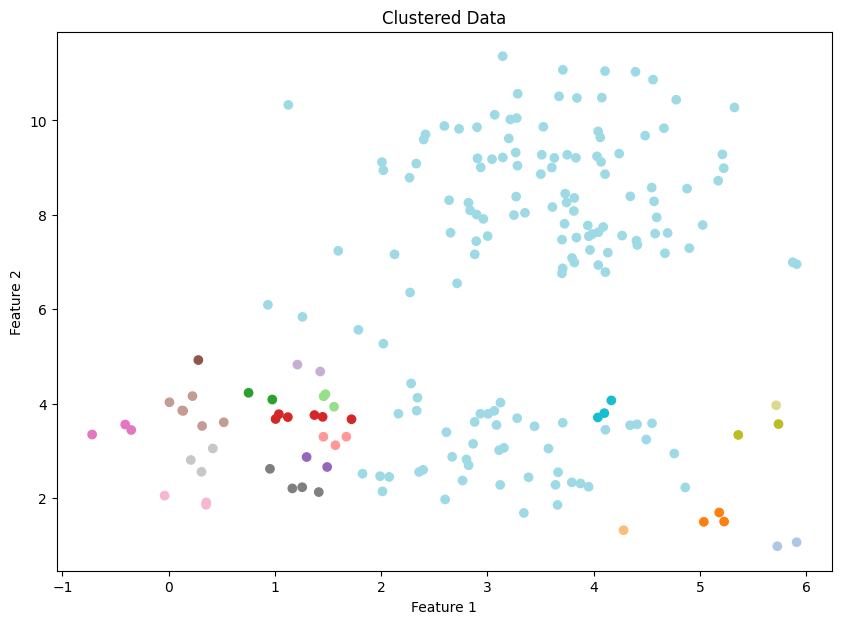

In [24]:

def generate_dataset(n_clusters=3, points_per_cluster=50, cluster_std=0.5):
    np.random.seed(42)  # For reproducibility
    clusters = []
    for i in range(n_clusters):
        center = np.random.rand(2) * 10  # Random cluster center
        cluster_points = np.random.randn(points_per_cluster, 2) * cluster_std + center
        clusters.append(cluster_points)
    return np.vstack(clusters)

def calculate_euclidean_distance(point1, point2):

  return np.linalg.norm(point1 - point2)

def calculate_distance_matrix(dataset):

  n = len(dataset)
  distance_matrix = np.zeros((n, n))
  for i in range(n):
    for j in range(i + 1, n):
      distance_matrix[i, j] = calculate_euclidean_distance(dataset[i], dataset[j])
      distance_matrix[j, i] = distance_matrix[i, j]
  return distance_matrix

def agglomerative_hierarchical_clustering(distance_matrix, linkage_method):

  return linkage(distance_matrix, method=linkage_method)

def plot_dendrogram(linkage_matrix):

  plt.figure(figsize=(10, 7))
  dendrogram(linkage_matrix)
  plt.title(f'Dendrogram | {linkage_method}')
  plt.xlabel('Sample Index')
  plt.ylabel('Distance')
  plt.show()

num_clusters = 4
num_points_per_cluster = 50
noise_stddev = 1
dataset = generate_dataset(num_clusters, num_points_per_cluster, noise_stddev)

distance_matrix = calculate_distance_matrix(dataset)

linkage_methods = ['single', 'complete', 'average']
for linkage_method in linkage_methods:
  linkage_matrix = agglomerative_hierarchical_clustering(distance_matrix, linkage_method)
  plot_dendrogram(linkage_matrix)
  distance_threshold = 5  # Adjust this threshold as needed
  visualize_clusters(dataset, linkage_matrix, distance_threshold)